Training Features Shape: (7352, 561)
Training Labels Shape: (7352,)
Testing Features Shape: (2947, 561)
Testing Labels Shape: (2947,)


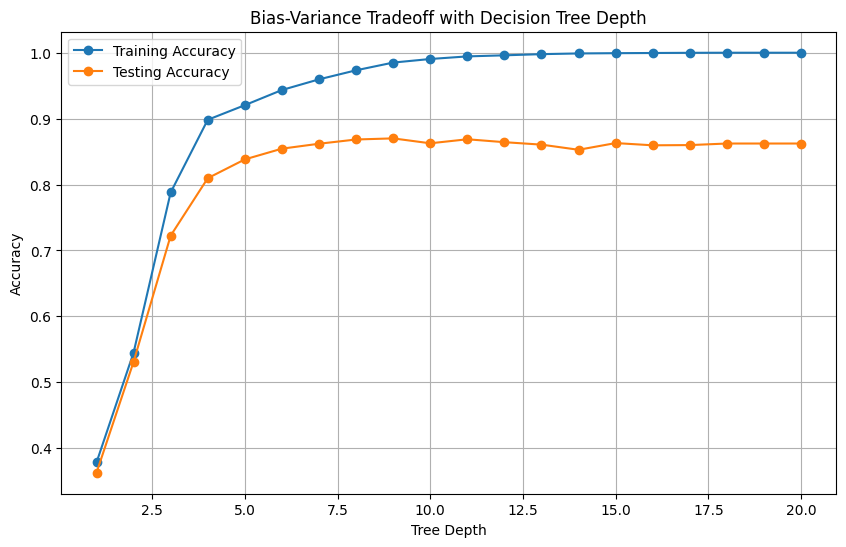

Optimal depth occurs where training and testing accuracy are balanced.


In [ ]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt


train_features_path = r"C:\Users\Jeet\Desktop\IIT_Gandhinagar\Dataset_Folder\UCI HAR Dataset\UCI HAR Dataset\train\X_train.txt"
train_labels_path = r"C:\Users\Jeet\Desktop\IIT_Gandhinagar\Dataset_Folder\UCI HAR Dataset\UCI HAR Dataset\train\y_train.txt"
test_features_path = r"C:\Users\Jeet\Desktop\IIT_Gandhinagar\Dataset_Folder\UCI HAR Dataset\UCI HAR Dataset\test\X_test.txt"
test_labels_path = r"C:\Users\Jeet\Desktop\IIT_Gandhinagar\Dataset_Folder\UCI HAR Dataset\UCI HAR Dataset\test\y_test.txt"


import os
paths = [train_features_path, train_labels_path, test_features_path, test_labels_path]
for path in paths:
    if not os.path.exists(path):
        print(f"File not found: {path}")
        break
else:

    X_train = pd.read_csv(train_features_path, delim_whitespace=True, header=None)
    y_train = pd.read_csv(train_labels_path, delim_whitespace=True, header=None).squeeze()
    X_test = pd.read_csv(test_features_path, delim_whitespace=True, header=None)
    y_test = pd.read_csv(test_labels_path, delim_whitespace=True, header=None).squeeze()


    print("Training Features Shape:", X_train.shape)
    print("Training Labels Shape:", y_train.shape)
    print("Testing Features Shape:", X_test.shape)
    print("Testing Labels Shape:", y_test.shape)

    depths = range(1, 21)
    train_accuracies = []
    test_accuracies = []

    for depth in depths:
        model = DecisionTreeClassifier(max_depth=depth, random_state=42)
        model.fit(X_train, y_train)

        train_accuracies.append(accuracy_score(y_train, model.predict(X_train)))
        test_accuracies.append(accuracy_score(y_test, model.predict(X_test)))

    plt.figure(figsize=(10, 6))
    plt.plot(depths, train_accuracies, label="Training Accuracy", marker='o')
    plt.plot(depths, test_accuracies, label="Testing Accuracy", marker='o')
    plt.title("Bias-Variance Tradeoff with Decision Tree Depth")
    plt.xlabel("Tree Depth")
    plt.ylabel("Accuracy")
    plt.legend()
    plt.grid()
    plt.show()

    print("Optimal depth occurs where training and testing accuracy are balanced.")
